In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv('Data_Preprocessed.csv')
df.shape

(283043, 33)

In [3]:
# нормализация из прошлого скрипта
from sklearn.preprocessing import StandardScaler, MinMaxScaler
normalize_columns = ['price', 'powerPS', 'model', 'brand', 'Age']
scaler = MinMaxScaler()
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['kilometer']), df['kilometer'],
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((226434, 32), (56609, 32))

In [5]:
# В качестве baseline возьмем наивный классификатор, его качество будет около 76%
df['kilometer'].value_counts(normalize=True)

1    0.762121
0    0.237879
Name: kilometer, dtype: float64

## Обучим нейронку

In [6]:
import tensorflow as tf
from tensorflow import keras

Задача нейронкой скорее всего не очень хорошо решается, так что ниже скрипты будут скорее чтобы показать, что так можно делать

#### Один слой

In [7]:
keras.backend.clear_session()

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.AUC()])

In [9]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=X_train.shape[0],
                    callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - 0s 331ms/step - loss: 0.6765 - auc: 0.5502 - val_loss: 0.6667 - val_auc: 0.5472
Epoch 2/200
1/1 [==============================] - 0s 111ms/step - loss: 0.6666 - auc: 0.5487 - val_loss: 0.6572 - val_auc: 0.5455
Epoch 3/200
1/1 [==============================] - 0s 100ms/step - loss: 0.6572 - auc: 0.5473 - val_loss: 0.6481 - val_auc: 0.5441
Epoch 4/200
1/1 [==============================] - 0s 95ms/step - loss: 0.6481 - auc: 0.5459 - val_loss: 0.6395 - v

1/1 [==============================] - 0s 127ms/step - loss: 0.5218 - auc: 0.6735 - val_loss: 0.5208 - val_auc: 0.6717
Epoch 59/200
1/1 [==============================] - 0s 118ms/step - loss: 0.5210 - auc: 0.6763 - val_loss: 0.5200 - val_auc: 0.6743
Epoch 60/200
1/1 [==============================] - 0s 113ms/step - loss: 0.5202 - auc: 0.6789 - val_loss: 0.5192 - val_auc: 0.6769
Epoch 61/200
1/1 [==============================] - 0s 112ms/step - loss: 0.5194 - auc: 0.6815 - val_loss: 0.5185 - val_auc: 0.6796
Epoch 62/200
1/1 [==============================] - 0s 116ms/step - loss: 0.5186 - auc: 0.6840 - val_loss: 0.5177 - val_auc: 0.6820
Epoch 63/200
1/1 [==============================] - 0s 110ms/step - loss: 0.5178 - auc: 0.6864 - val_loss: 0.5169 - val_auc: 0.6844
Epoch 64/200
1/1 [==============================] - 0s 114ms/step - loss: 0.5171 - auc: 0.6887 - val_loss: 0.5162 - val_auc: 0.6867
Epoch 65/200
1/1 [==============================] - 0s 109ms/step - loss: 0.5163 - auc: 0

1/1 [==============================] - 0s 98ms/step - loss: 0.4461 - auc: 0.8021 - val_loss: 0.4462 - val_auc: 0.7997
Epoch 183/200
1/1 [==============================] - 0s 106ms/step - loss: 0.4456 - auc: 0.8027 - val_loss: 0.4457 - val_auc: 0.8003
Epoch 184/200
1/1 [==============================] - 0s 94ms/step - loss: 0.4451 - auc: 0.8033 - val_loss: 0.4452 - val_auc: 0.8009
Epoch 185/200
1/1 [==============================] - 0s 94ms/step - loss: 0.4446 - auc: 0.8039 - val_loss: 0.4447 - val_auc: 0.8014
Epoch 186/200
1/1 [==============================] - 0s 93ms/step - loss: 0.4441 - auc: 0.8044 - val_loss: 0.4442 - val_auc: 0.8020
Epoch 187/200
1/1 [==============================] - 0s 88ms/step - loss: 0.4435 - auc: 0.8050 - val_loss: 0.4437 - val_auc: 0.8026
Epoch 188/200
1/1 [==============================] - 0s 94ms/step - loss: 0.4430 - auc: 0.8055 - val_loss: 0.4432 - val_auc: 0.8031
Epoch 189/200
1/1 [==============================] - 0s 96ms/step - loss: 0.4425 - auc: 0

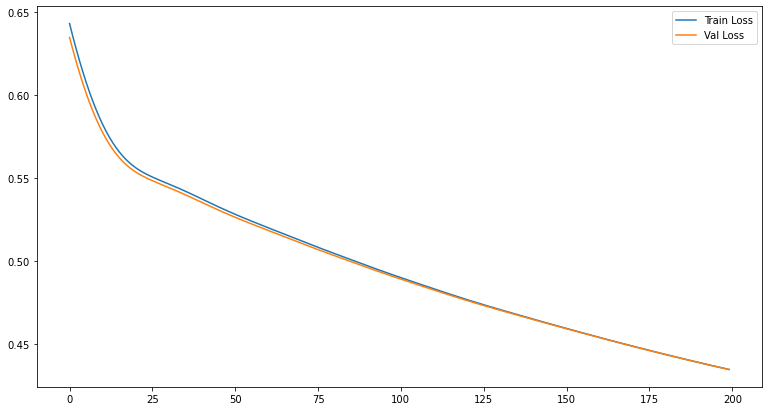

In [10]:
plt.figure(figsize=(13, 7))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss', 'Val Loss'])
pass

In [11]:
model.save('First_model.h5')

#### Добавим слоев

In [8]:
keras.backend.clear_session()

In [9]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.AUC()])

In [10]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=2048,
                    callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

89/89 [==============================] - 1s 9ms/step - loss: 0.5422 - auc: 0.6120 - val_loss: 0.5002 - val_auc: 0.7273
Epoch 2/200
89/89 [==============================] - 1s 6ms/step - loss: 0.4775 - auc: 0.7583 - val_loss: 0.4552 - val_auc: 0.7858
Epoch 3/200
89/89 [==============================] - 1s 7ms/step - loss: 0.4369 - auc: 0.8086 - val_loss: 0.4206 - val_auc: 0.8214
Epoch 4/200
89/89 [==============================] - 1s 6ms/step - loss: 0.4100 - auc: 0.8286 - val_loss: 0.4015 - 

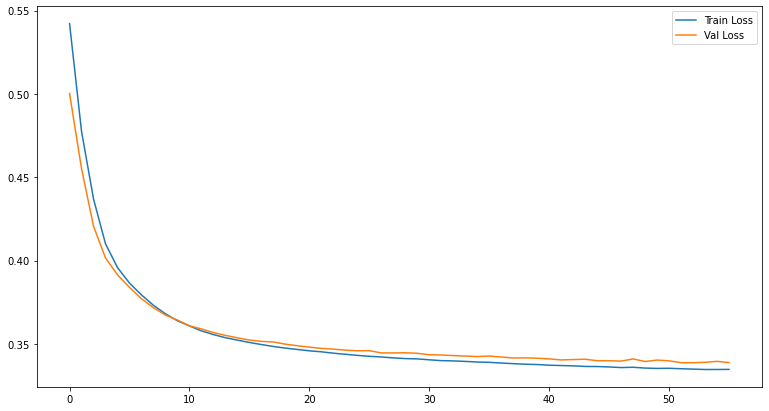

In [11]:
plt.figure(figsize=(13, 7))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss', 'Val Loss'])
pass

In [16]:
model.save('Second_model.h5')

#### Попробуем по батчам + Dropout + BatchNorm

In [17]:
keras.backend.clear_session()

In [18]:
model = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.AUC()])

In [19]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=1024,
                    callbacks=keras.callbacks.EarlyStopping(monitor='val_auc', patience=5))

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

177/177 [==============================] - 1s 6ms/step - loss: 0.4463 - auc: 0.7803 - val_loss: 0.4427 - val_auc: 0.8215
Epoch 2/200
177/177 [==============================] - 1s 4ms/step - loss: 0.3988 - auc: 0.8283 - val_loss: 0.3927 - val_auc: 0.8568
Epoch 3/200
177/177 [==============================] - 1s 4ms/step - loss: 0.3892 - auc: 0.8383 - val_loss: 0.3634 - val_auc: 0.8647
Epoch 4/200
177/177 [==============================] - 1s 4ms/step - loss: 0.3843 - auc: 0.8425 - val_loss: 0

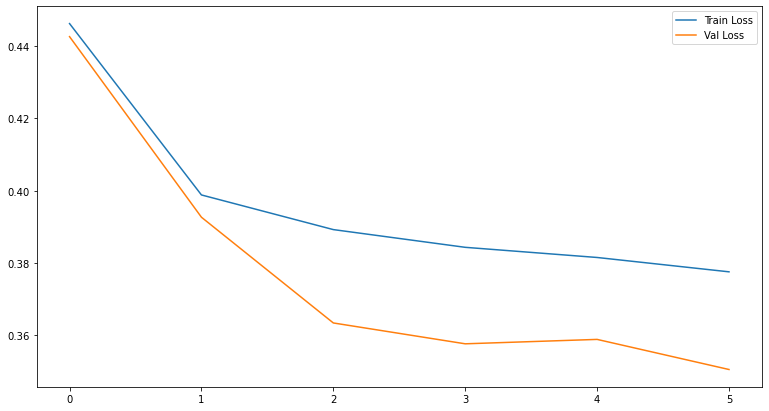

In [20]:
plt.figure(figsize=(13, 7))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss', 'Val Loss'])
pass

In [21]:
model.save('Third_model.h5')

Вообще неплохо, давайте на другие метрики на тесте посмотрим, хотя без разницы сколько слоев, по батчам только быстрее обучать выходит, что логично, затем gpu и нужен

In [47]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score, roc_auc_score

In [48]:
model = keras.models.load_model('Second_model.h5')

In [49]:
y_pred = (model.predict(X_test) > 0.5).astype(np.int)

In [50]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
roc_auc = round(roc_auc_score(y_test, y_pred), 2)
print('Test Scores')
print('Accuracy: {}, Precision: {}, Recall: {}, F1: {}, Roc_Auc: {}'.format(accuracy, precision, recall, f1, roc_auc))

Test Scores
Accuracy: 0.86, Precision: 0.89, Recall: 0.94, F1: 0.91, Roc_Auc: 0.78


В целом меня удовлетворяет полученное качество, с этим можно играться и дальше улучшать модель (в нейронках куда больше параметров чем в условном KNN), но не очень понятно зачем